In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('emotion_dataworld.csv') 
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [5]:
df = df.rename(columns={"sentiment": "Emotion", "content": "Text"})

In [6]:
df.drop( df[ (df['Emotion'] == 'neutral')].index, inplace=True)

In [7]:
df = df.reset_index()

In [8]:
df = df.drop(['index','tweet_id','author'], axis = 1)

In [9]:
df['Emotion'].value_counts()

worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: Emotion, dtype: int64

In [10]:
df['Emotion'][df['Emotion']== 'worry'] = 'negative'
df['Emotion'][df['Emotion']== 'happiness'] = 'positive'
df['Emotion'][df['Emotion']== 'sadness'] = 'negative'
df['Emotion'][df['Emotion']== 'love'] = 'positive'
df['Emotion'][df['Emotion']== 'surprise'] = 'positive'
df['Emotion'][df['Emotion']== 'fun'] = 'positive'
df['Emotion'][df['Emotion']== 'relief'] = 'positive'
df['Emotion'][df['Emotion']== 'hate'] = 'negative'
df['Emotion'][df['Emotion']== 'empty'] = 'negative'
df['Emotion'][df['Emotion']== 'enthusiasm'] = 'positive'
df['Emotion'][df['Emotion']== 'boredom'] = 'negative'
df['Emotion'][df['Emotion']== 'anger'] = 'negative'

In [11]:
df['Emotion'].value_counts()

negative    16063
positive    15299
Name: Emotion, dtype: int64

In [12]:
import texthero as hero

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [14]:
train['clean_text'] = hero.clean(train['Text'])

In [15]:
train['tfidf_clean_text'] = hero.tfidf(train['clean_text'])

In [16]:
train['pca_tfidf_clean_text'] = hero.pca(train['tfidf_clean_text'])

In [17]:
hero.scatterplot(train, col='pca_tfidf_clean_text', color='Emotion', title="Feelings")

In [69]:
NUM_TOP_WORDS = 30

train.groupby('Emotion')['clean_text'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

Emotion          
negative  work        701
          im          539
          good        533
          sad         504
          miss        476
          want        421
          sorry       410
          still       409
          feel        396
          think       394
          bad         380
          need        379
          lol         345
          hate        322
          wish        305
          new         267
          sleep       262
          sick        250
          love        248
          gonna       239
          could       229
          getting     223
          right       220
          dont        219
          sucks       211
          people      201
          days        190
          come        190
          never       189
          way         184
positive  good       1006
          love        973
          happy       928
          lol         626
          thanks      544
          great       498
          new         426
          mother    

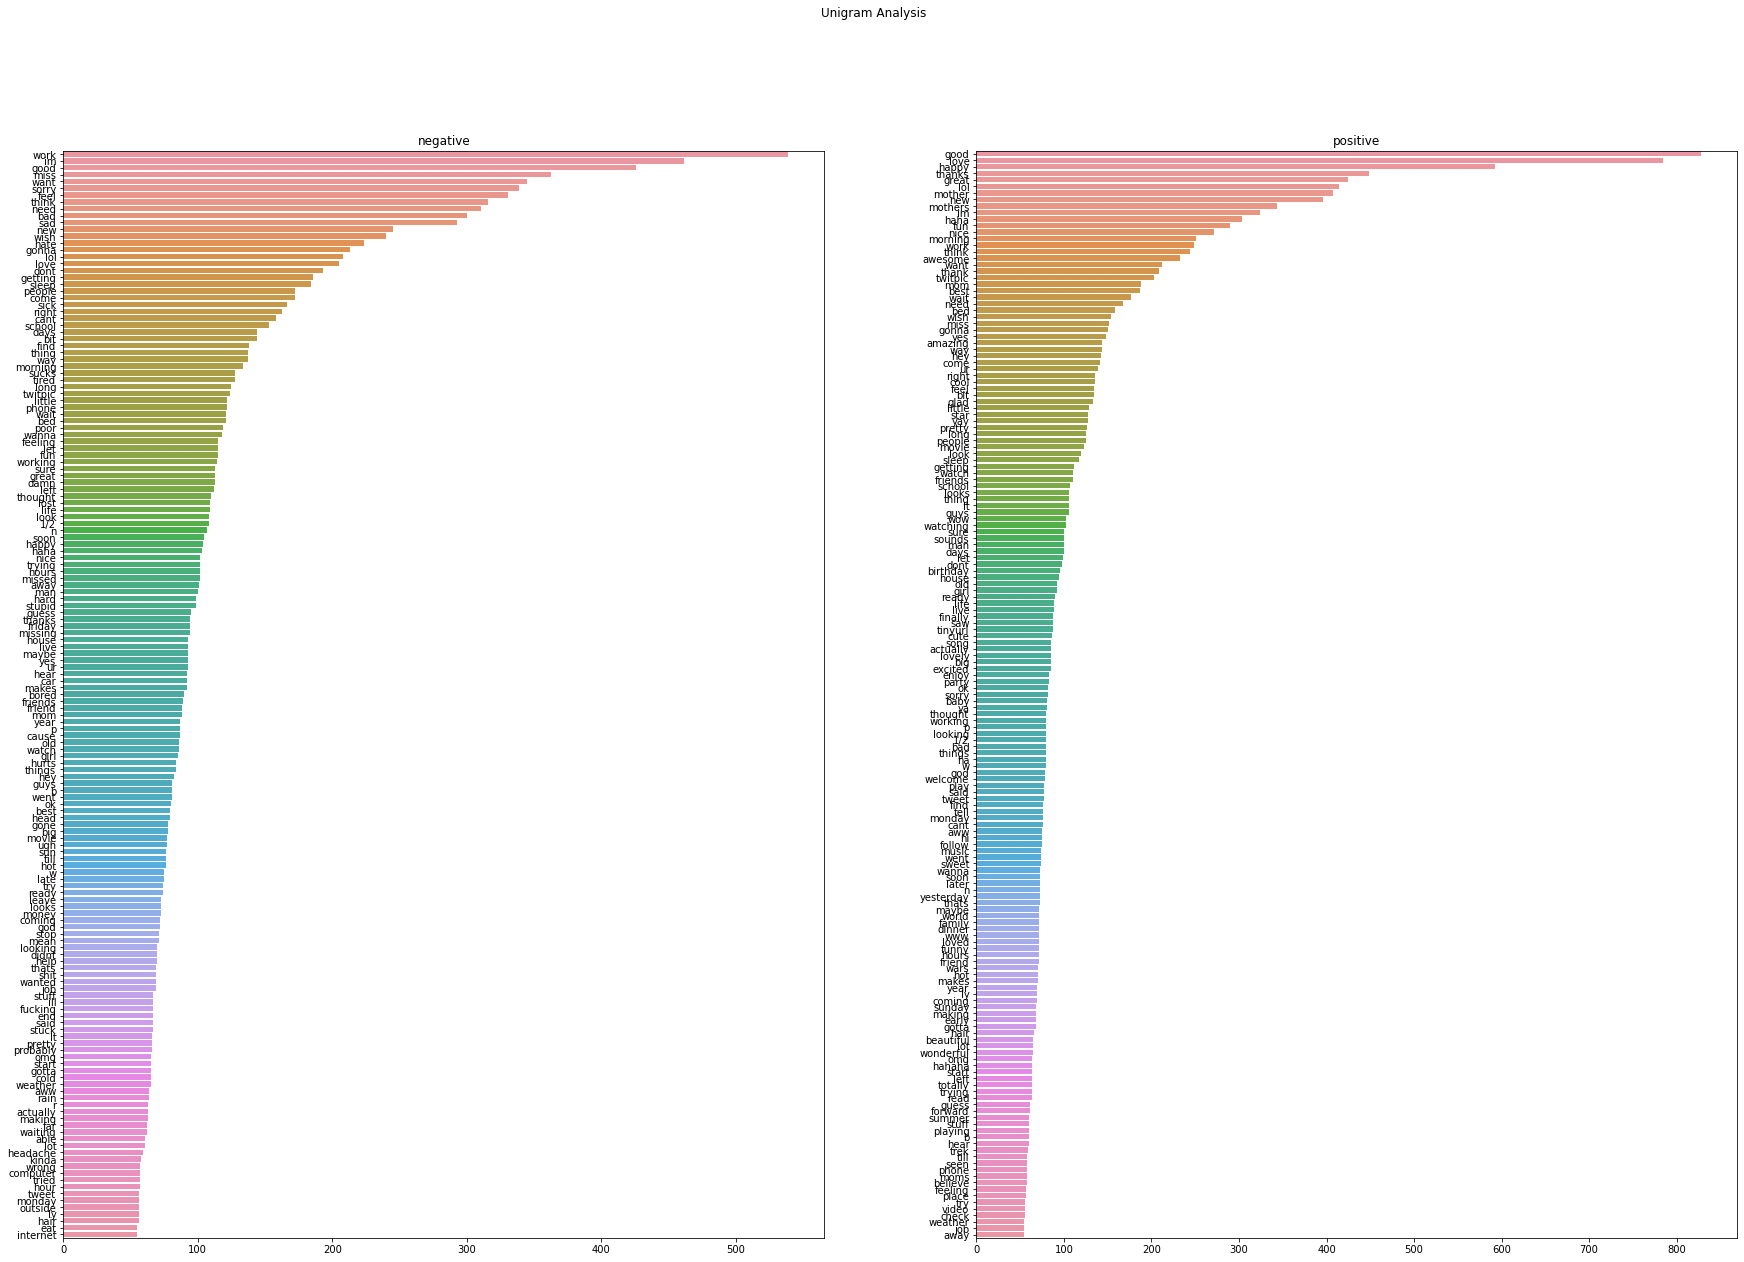

In [78]:
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

fig, axes = plt.subplots(1,len(train['Emotion'].unique()), figsize=(30,20))
fig.suptitle('Unigram Analysis')

for index,emotion in enumerate(train['Emotion'].unique()):
    dct=defaultdict(int) 
    curdf=train[train['Emotion']==emotion]
    allwordsarr=curdf['clean_text'].str.cat().split()
    counter=Counter(allwordsarr)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:200]:
        if (word.lower() not in STOP_WORDS):
            x.append(word)
            y.append(count)
    sns.barplot(ax=axes[index],x=y,y=x)
    axes[index].set_title(str(emotion))

In [72]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)


In [20]:
df[df['Emotion']=='negative'][df['Text'].str.contains("good")]

c:\Users\Apprenant\anaconda3\envs\caret\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Emotion,Text
143,negative,@melluffsyew Umm yeah. That's probably a pretty good note to self because eeeeeewwwwwwww.
216,negative,Decided that no matter how good my hair looks curly it doesn't justify the burn I get from the curler! My hands covered I suck at it!
253,negative,I dont feel good AT ALL. fuckkk
265,negative,Taylor Swift and Joe Jonas looked really good together. I'm kinda sad they broke up.
303,negative,does anyone know any good rap songs? i need to make a rap/fun cd and i have no idea helllllpppp
325,negative,Tactical mistake: going to the city library and buying milk. Who knew? OUCH OUCH OUCH. Maybe a good thing I didn't try for uni.
357,negative,"comfort food of the day: pan mee. though, it didnt taste any good.."
369,negative,didnt say goodnight to you
373,negative,today we say goodbye to the second good friend in a week from dmp but at least the sun is shinning and I'm definately NOT working this pm
413,negative,Know what would be great? For my shoulder to stop hurting so I can sleep normal again. I just want/need a few solid hours of good sleep.


In [21]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["week","yeah","better","make","home","oh","tomorrow","though","twitter","tonight","weekend","would","night","much","well","last","see","hope","com","day","get","like","go","today","going","got","quot","really","know","back","u","one","time","http","amp"]))
train['clean_text'] = hero.remove_stopwords(train['clean_text'], custom_stopwords)

In [74]:
train.head()

,Emotion,Text,clean_text,tfidf_clean_text,pca_tfidf_clean_text
12291,negative,"@kabobbins nevermind....I kept reading and see ya'll r gonna be in Williamsburg I'll mind my business now, lol",kabobbins nevermind kept reading ya r gonna williamsburg mind business lol,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[-0.025190741616724275, 0.006110518753947746]"
5939,negative,because I just lost my first Field Notes notebook 6 pages before filling it up!! RIP #fieldnotes,lost first field notes notebook pages filling rip fieldnotes,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[-0.019838968454764107, 0.006327222552833638]"
18393,positive,a sunny day brights up the day!,sunny brights,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[0.29366487577745015, -0.027373395533654647]"
28872,positive,Having dinner with my grandma since I couldn't be with my mum.,dinner grandma since mum,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[-0.007140779409838247, 0.007456562400715505]"
4091,negative,@faulko1 i'm watchign the garden from the window...far too hot for me,faulko1 watchign garden window far hot,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[-0.021262239122448574, 0.005356235975615088]"


In [23]:
import fasttext

In [24]:
df_train = pd.DataFrame(data= np.c_[train['Text'], train['Emotion']], columns= ['Text','Emotion'])
df_test = pd.DataFrame(data= np.c_[test['Text'], test['Emotion']], columns= ['Text','Emotion'])

In [127]:
df_train['clean_text'] = hero.clean(df_train['Text'])
df_test['clean_text'] = hero.clean(df_test['Text'])
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["though","twitter","tonight","weekend","would","night","much","well","last","see","hope","com","day","get","like","go","today","going","got","quot","really","know","back","u","one","time","http","amp"]))

df_train['clean_text'] = hero.remove_stopwords(df_train['clean_text'], custom_stopwords)
df_test['clean_text'] = hero.remove_stopwords(df_test['clean_text'], custom_stopwords)

In [77]:
df_train.head()

,Text,Emotion,clean_text
0,"@kabobbins nevermind....I kept reading and see ya'll r gonna be in Williamsburg I'll mind my business now, lol",__label__negative,kabobbins nevermind kept reading ya r gonna williamsburg mind business lol
1,because I just lost my first Field Notes notebook 6 pages before filling it up!! RIP #fieldnotes,__label__negative,lost first field notes notebook pages filling rip fieldnotes
2,a sunny day brights up the day!,__label__positive,sunny brights
3,Having dinner with my grandma since I couldn't be with my mum.,__label__positive,dinner grandma since mum
4,@faulko1 i'm watchign the garden from the window...far too hot for me,__label__negative,faulko1 watchign garden window far hot


In [26]:
# je remplace ma colonne target  par son label 

df_train["Emotion"] = df_train[["Emotion"]].apply(lambda x: '__label__' + x)

# je fais pareil pour le jeu de test

df_test["Emotion"] = df_test[["Emotion"]].apply(lambda x: '__label__' + x)

In [128]:
# Saving the CSV file as a text file to train/test the classifier
import csv
df_train[['Emotion', 'clean_text']].to_csv('train_alt2.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")
df_test[['Emotion', 'clean_text']].to_csv('test_alt2.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")

In [140]:
model = fasttext.train_supervised('train_alt2.txt', wordNgrams = 4, loss='softmax')

In [141]:
model.test('test_alt2.txt')  

(6273, 0.735533237685318, 0.735533237685318)

In [48]:
model.save_model("model_alt_7374.ftz")